In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [5]:
rawfile = 'Data/Input_230907_adata_minFilt_random_raw.h5ad'
hvgfile = 'Output_230907_adata_scvi_random_sampleID.h5ad'

In [6]:
adata = sc.read_h5ad(rawfile)

In [7]:
adata

AnnData object with n_obs × n_vars = 393064 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'Brain_Region_Rough', 'Brain_Region_Unit', 'Brain_Region2'
    uns: 'log1p'
    layers: 'counts', 'logcounts', 'scaled'

In [8]:
adata_hvg = sc.read_h5ad(hvgfile)

In [9]:
adata_hvg

AnnData object with n_obs × n_vars = 393064 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Dataset_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_main_colors', 'hvg', 'leiden', 'leiden_0.5_colors', 'leiden_0.7_colors', 'leiden_1.0_colors', 'leiden_scvi_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

In [10]:
adata.obs = adata_hvg.obs.copy()
adata.obsm = adata_hvg.obsm.copy()

In [11]:
adata = adata[adata.obs["pct_counts_mt"] < 30]
adata

View of AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0'
    uns: 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [ ]:
# # Run Dendrogram
# sc.tl.dendrogram(adata, groupby="leiden_scvi")
# ax = sc.pl.dendrogram(
#     adata,
#     groupby="leiden_scvi")

# Stage

In [12]:
adata.obs.Stage2.value_counts()

Adult (40-60Y)           74482
Fetal (1st trimester)    68108
Adult (60-80Y)           55500
Adult (20-40Y)           45656
Neonatal                 37254
Fetal (2nd trimester)    35183
Childhood (1-6Y)         30726
Adolescence (12-20Y)     14010
Childhood (6-12Y)        13739
Adult (>80Y)             11967
Fetal (3rd trimester)     6435
Name: Stage2, dtype: int64

/tmp/ipykernel_1182552/1107086184.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Stage2'] = pd.Categorical(adata.obs['Stage2'], categories=col_dict_stage.keys(), ordered=True)


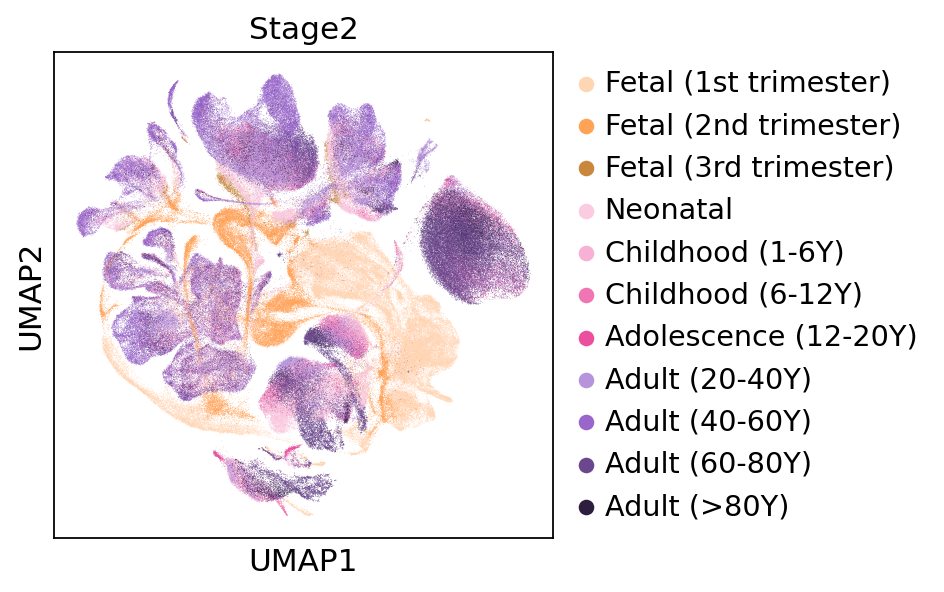

In [13]:
sc.set_figure_params(vector_friendly=True)
col_dict_stage = {'Fetal (1st trimester)': '#ffd6b4',
            'Fetal (2nd trimester)': '#ffa357',
            'Fetal (3rd trimester)': '#c8873d',
            'Neonatal': '#fbcbe1',
            'Childhood (1-6Y)': '#f6b1d4',
            'Childhood (6-12Y)': '#f076b3',
            'Adolescence (12-20Y)': '#eb4f9e',
            'Adult (20-40Y)': '#b793db',
            'Adult (40-60Y)': '#9966cc',
            'Adult (60-80Y)': '#6b478e',
            'Adult (>80Y)': '#2d1e3d'}

adata.obs['Stage2'] = pd.Categorical(adata.obs['Stage2'], categories=col_dict_stage.keys(), ordered=True)

sc.pl.umap(adata, color='Stage2', palette=col_dict_stage)

# Cluster_main

In [14]:
# https://www.color-hex.com/color-names.html
col_dict_clustermain = {
    'Astro': '#0048ba',
    'GR': '#b0bf1a',
    'Ext': '#ff9f00',
    'IN': '#702963',
    'Glioblast': '#8b8378',
    'Limbic': '#00ffff',
    'MG': '#fdee00',
    'Neural crest': '#c19a6b',
    'Neuroblast': '#e63e62',
    'OD': '#a3c1ad',
    'OPC': '#ff91af',
    'Others': '#bfff00',
    'PK': '#fe6f5e',
    'RG': '#458b74',
    'Unipolar brush':'#4876ff'
}

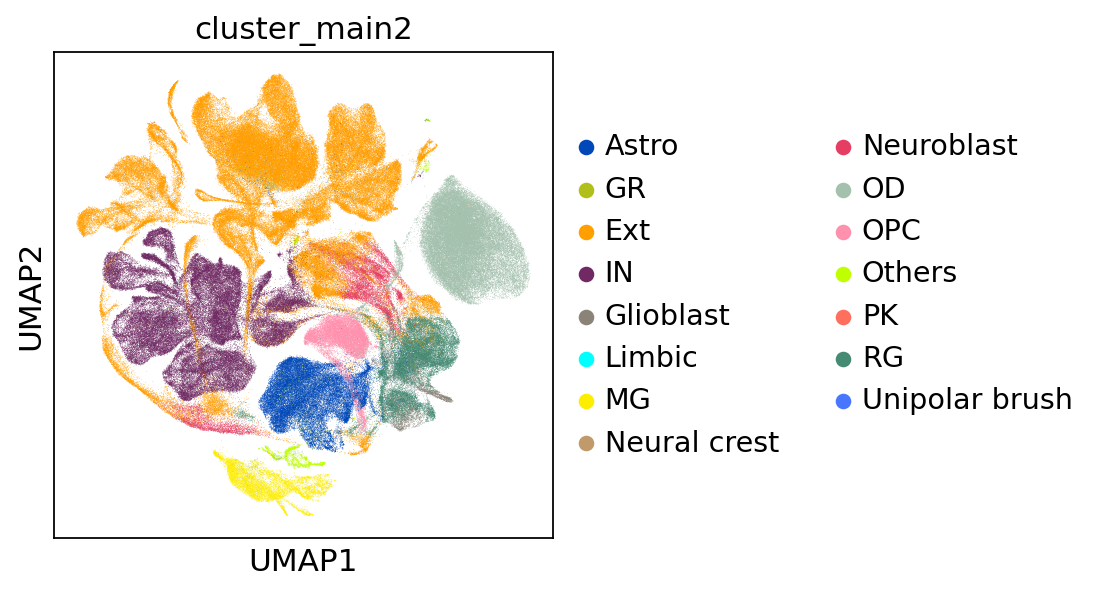

In [15]:
adata.obs['cluster_main'] = adata.obs['cluster_main'].astype(str)
adata.obs.loc[(adata.obs['cluster_original'] == 'Inhibitory interneurons'), 'cluster_main'] = 'IN'
adata.obs.loc[(adata.obs['cluster_original'] == 'Astro'), 'cluster_main'] = 'Astro'
adata.obs.loc[(adata.obs['cluster_original'] == 'Oligo'), 'cluster_main'] = 'OD'
adata.obs.loc[(adata.obs['cluster_original'] == 'Unipolar brush cells'), 'cluster_main'] = 'Unipolar brush'

adata.obs['cluster_main2'] = pd.Categorical(adata.obs['cluster_main'], categories=col_dict_clustermain.keys(), ordered=True)

sc.pl.umap(adata, color='cluster_main2', palette=col_dict_clustermain)

# Brain region

In [16]:
adata.obs['Brain_Region2'] = adata.obs['Brain_Region'].astype(str)

adata.obs.loc[(adata.obs['Brain_Region'] == 'A1C'), 'Brain_Region2'] = 'Primary auditory cortex (BA41/42)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'V1C'), 'Brain_Region2'] = 'Primary visual cortex (BA17)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'CgG'), 'Brain_Region2'] = 'Anterior cingulate gyrus (BA24/32/33)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'MTG'), 'Brain_Region2'] = 'Middle temporal gyrus (BA21)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'S1lm'), 'Brain_Region2'] = 'Primary somatosensory cortex, lower limb (BA3)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'S1ul'), 'Brain_Region2'] = 'Primary somatosensory cortex, upper limb (BA3)'

adata.obs.loc[(adata.obs['Brain_Region'] == 'M1'), 'Brain_Region2'] = 'Primary motor cortex (BA4)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'M1lm'), 'Brain_Region2'] = 'Primary motor cortex, lower limb (BA4)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'M1ul'), 'Brain_Region2'] = 'Primary motor cortex, upper limb (BA4)'


# DLPFC is attributed anatomically to BA 9 and 46 and BA 8, 9 and 10.
adata.obs.loc[(adata.obs['Brain_Region'] == 'BA9'), 'Brain_Region2'] = 'Dorsolateral prefrontal cortex (BA9)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'BA8'), 'Brain_Region2'] = 'Frontal cortex (BA8)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'Cortex frontal'), 'Brain_Region2'] = 'Frontal cortex (BA8)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'Frontal Cortex'), 'Brain_Region2'] = 'Frontal cortex (BA8)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'prefrontal cortex'), 'Brain_Region2'] = 'Dorsolateral prefrontal cortex (BA9)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'BA10'), 'Brain_Region2'] = 'Anterior prefrontal cortex (BA10)'
adata.obs.loc[(adata.obs['Brain_Region'] == 'BA46'), 'Brain_Region2'] = 'Dorsolateral prefrontal cortex (BA46)'


adata.obs.loc[(adata.obs['Brain_Region'] == 'Brain'), 'Brain_Region2'] = 'Fetal Brain'
adata.obs.loc[(adata.obs['Brain_Region'] == 'striatum'), 'Brain_Region2'] = 'Striatum'
adata.obs.loc[(adata.obs['Brain_Region'] == 'telencephalon'), 'Brain_Region2'] = 'Telencephalon'
adata.obs.loc[(adata.obs['Brain_Region'] == 'ventral part of telencephalon'), 'Brain_Region2'] = 'Telencephalon, ventral part'
adata.obs.loc[(adata.obs['Brain_Region'] == 'ganglionic eminence'), 'Brain_Region2'] = 'Ganglionic Eminence'

adata.obs.Brain_Region2.value_counts()

Dorsolateral prefrontal cortex (BA9)     176459
Primary motor cortex (BA4)                74482
Frontal cortex (BA8)                      47284
Anterior prefrontal cortex (BA10)         11211
Cerebellum                                10288
Thalamus                                   9509
Cortex                                     8026
Dorsolateral prefrontal cortex (BA46)      7879
Ganglionic Eminence                        7637
Midbrain                                   6399
Fetal Brain                                5888
Medulla                                    5161
Forebrain                                  4889
Subcortex                                  3090
Pons                                       2382
Hypothalamus                               2303
Cortex temporal                            2228
Diencephalon                               2114
Hindbrain                                  1969
Hippocampus                                1596
Cortex entorhinal                       

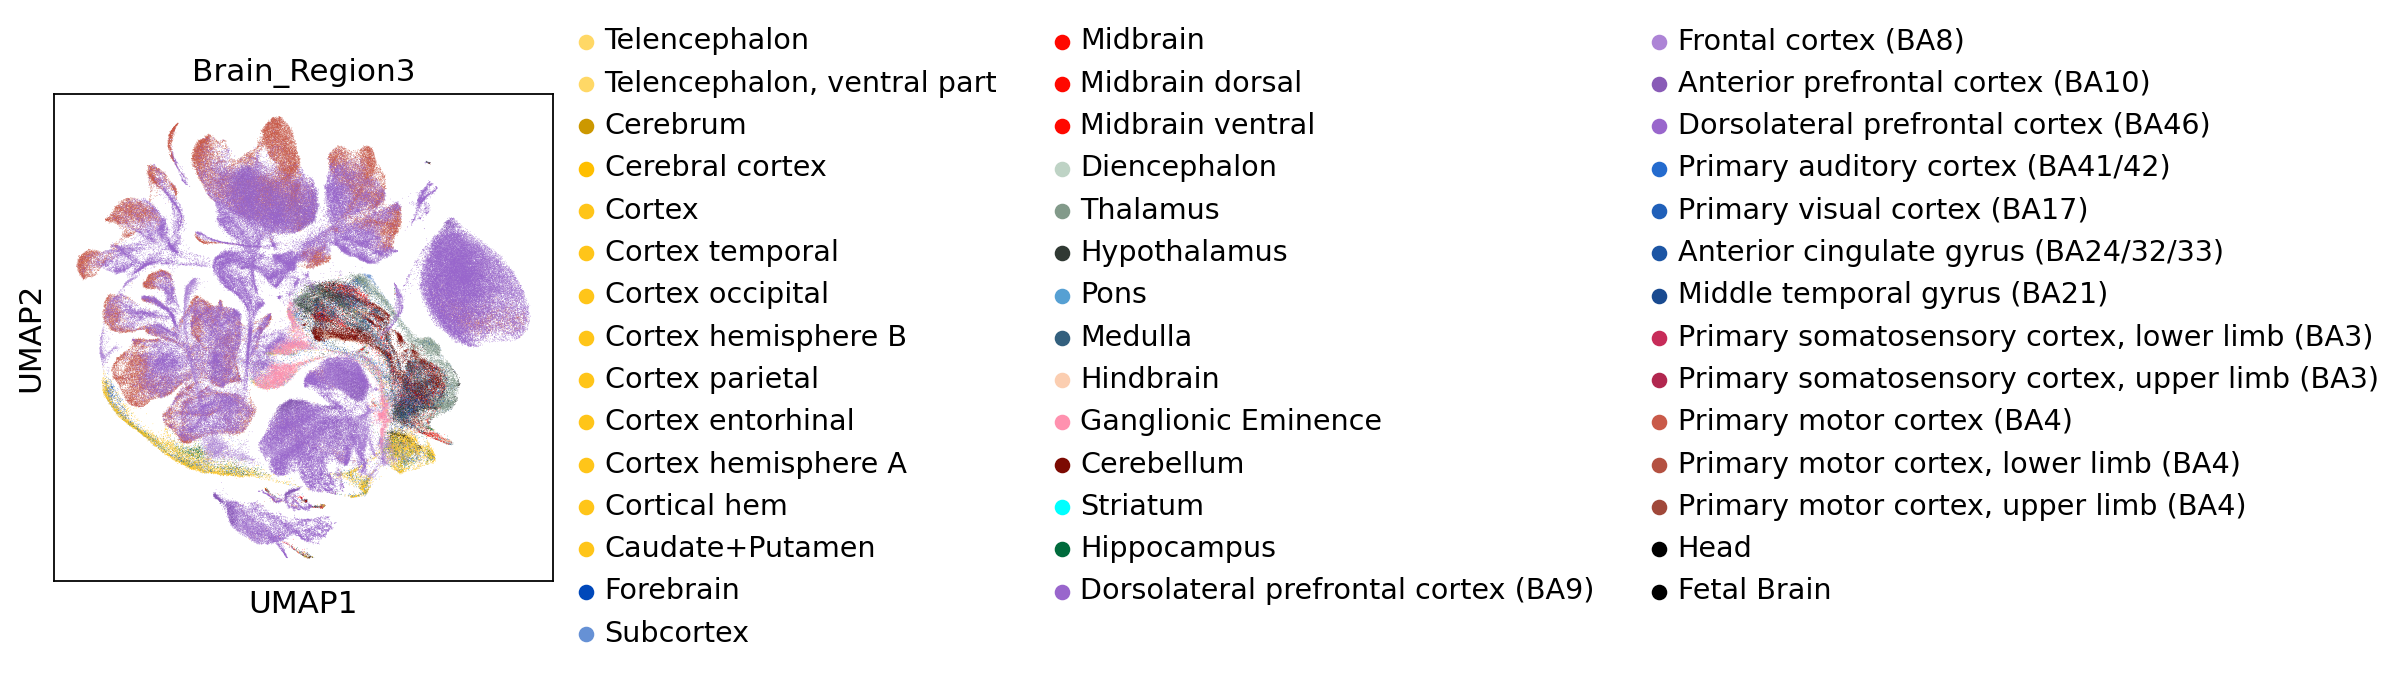

In [17]:
# https://www.color-hex.com/color-names.html
col_dict_region = {# Cortex general: Amber
    'Telencephalon': '#ffd866',
    'Telencephalon, ventral part': '#ffd866',
    'Cerebrum': '#cc9800',
    'Cerebral cortex': '#ffbf00',
    'Cortex': '#ffc519',
    'Cortex temporal': '#ffc519',
    'Cortex occipital': '#ffc519',
    'Cortex hemisphere B': '#ffc519',
    'Cortex parietal': '#ffc519',
    'Cortex entorhinal': '#ffc519',
    'Cortex hemisphere A': '#ffc519',
    'Cortical hem': '#ffc519',
    'Caudate+Putamen': '#ffc519',

    # Forebrain: Blue
    'Forebrain': '#0048ba',
    'Subcortex': '#6691d5',

    # Midbrain: Candy Apple Red
    'Midbrain': '#ff0800',
    'Midbrain dorsal': '#ff0800',
    'Midbrain ventral': '#ff0800',
    
    # Thalamus: Cambridge Blue
    'Diencephalon': '#bed3c5',
    'Thalamus': '#829a8a',
    'Hypothalamus': '#303933',
    
    # Pons and Medulla: Carolina Blue
    'Pons': '#56a0d3',
    'Medulla': '#33607e',

    # Hindbrain: light pink
    'Hindbrain': '#fbceb1',
    
    # Ganglionic Eminence: Baker-Miller Pink
    'Ganglionic Eminence': '#ff91af',
    
    # Cerebellum: Brown
    'Cerebellum': '#7C0A02',
    
    # Striatum: Cyan
    'Striatum': '#00FFFF',
    
    # Hippocampus: Cadmium Green
    'Hippocampus': '#006b3c',
    
    # DLPFC
    'Dorsolateral prefrontal cortex (BA9)': '#9966CC',
    'Frontal cortex (BA8)': '#ad84d6',
    'Anterior prefrontal cortex (BA10)': '#895bb7',
    'Dorsolateral prefrontal cortex (BA46)': '#9966cc',
    
    # Cortex (in progress...) Celtic Blue
    'Primary auditory cortex (BA41/42)': '#246bce',
    'Primary visual cortex (BA17)': '#2060b9',
    'Anterior cingulate gyrus (BA24/32/33)': '#1c55a4',
    'Middle temporal gyrus (BA21)': '#194a90',
    
    # Cerise
    'Primary somatosensory cortex, lower limb (BA3)': '#c72c59',
    'Primary somatosensory cortex, upper limb (BA3)': '#b1274f',
    
    # Cedar Chest
    'Primary motor cortex (BA4)': '#c95a49',
    'Primary motor cortex, lower limb (BA4)': '#b45141',
    'Primary motor cortex, upper limb (BA4)': '#a0483a',
    
    # Other: Black
    'Head': '#000000', 
    'Fetal Brain': '#000000',
}

adata.obs['Brain_Region3'] = pd.Categorical(adata.obs['Brain_Region2'], categories=col_dict_region.keys(), ordered=True)

sc.pl.umap(adata, color='Brain_Region3', palette=col_dict_region)

In [18]:
region_mapping = {
    "M1"                     : 	"Cerebral cortex",
    "Midbrain"               : 	"Midbrain",
    "Forebrain"             : 	"Forebrain",
    "Pons"                   : 	"Pons",
    "Medulla"                : 	"Medulla",
    "Subcortex"              : 	"Forebrain",
    "Head"                   : 	"Uncategorized",
    "Hindbrain"              : 	"Hindbrain",
    "Cerebellum"             : 	"Cerebellum",
    "Striatum"               : 	"Striatum",
    "Midbrain dorsal"        : 	"Midbrain",
    "Cortex"                 : 	"Cerebral cortex",
    "Diencephalon"           : 	"Thalamus",
    "Brain"                  : 	"Uncategorized",
    "Hippocampus"            : 	"Hippocampus",
    "Thalamus"               : 	"Thalamus",
    "Cortex temporal"        : 	"Cerebral cortex",
    "Cortex parietal"        : 	"Cerebral cortex",
    "Caudate+Putamen"        : 	"Striatum",
    "Hypothalamus"           : 	"Hypothalamus",
    "Cortex frontal"         : 	"Cerebral cortex",
    "Cortical hem"           : 	"Cerebral cortex",
    "Midbrain ventral"       : 	"Midbrain",
    "Telencephalon"          : 	"Cerebral cortex",
    "Cortex occipital"       : 	"Cerebral cortex",
    "Cortex entorhinal"      : 	"Cerebral cortex",
    "Cortex hemisphere B"    : 	"Cerebral cortex",
    "Cortex hemisphere A"    : 	"Cerebral cortex",
    "Frontal Cortex"         : 	"Cerebral cortex",
    "Ganglionic Eminence"    : 	"Ganglionic Eminence",
    "BA9"                    : 	"Cerebral cortex",
    "BA8"                    : 	"Cerebral cortex",
    "BA46"                   : 	"Cerebral cortex",
    "BA10"                   : 	"Cerebral cortex",
    "prefrontal cortex"      : 	"Cerebral cortex",
    "Cerebral cortex"        : 	"Cerebral cortex",
}

adata.obs["Brain_Region_Unit"] = adata.obs["Brain_Region"].replace(region_mapping)
adata.obs["Brain_Region_Unit"].value_counts()

Cerebral cortex        328525
Thalamus                11623
Cerebellum              10288
Forebrain                7979
Ganglionic Eminence      7637
Midbrain                 6811
Uncategorized            5888
Medulla                  5161
Pons                     2382
Hypothalamus             2303
Hindbrain                1969
Hippocampus              1596
Striatum                  898
Name: Brain_Region_Unit, dtype: int64

In [20]:
adata.obs.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI',
       'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis',
       'DF_classification', 'cluster_original', 'cluster_main', 'n_genes',
       'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch',
       '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0',
       'cluster_main2', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit'],
      dtype='object')

# Annotation

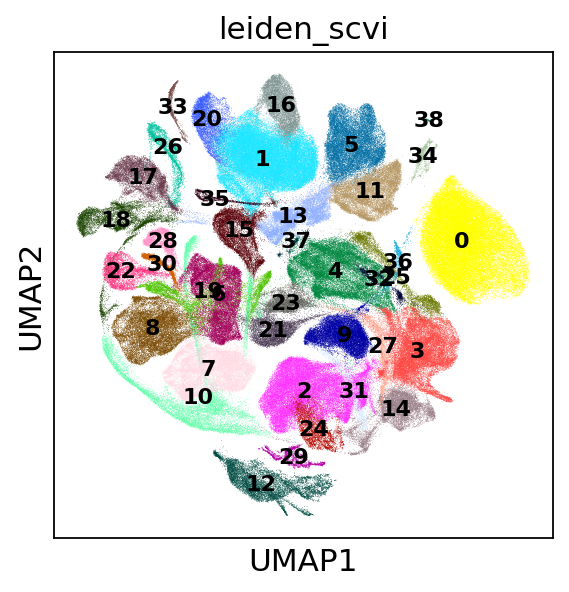

In [22]:
sc.pl.umap(adata, color=["leiden_scvi"], legend_loc='on data', legend_fontsize=10)

In [23]:
marker_genes_dict = {
	'Inh1': ['GAD1', 'ADARB2', 'PAX6', 'LAMP5'], 
	'Inh2': ['VIP'], 
	'Inh3': ['LHX6', 'SST'], 
	'Inh4': ['PVALB'],
    'Exc': ['SLC17A7', 'LINC00507', 'RORB', 'THEMIS', 'FEZF2'],
    'Non': ['SLC1A3', 'PDGFRA', 'FGFR3', 'OPALIN', 'NOSTRIN', 'TYROBP'],
}

In [ ]:
# sc.pl.matrixplot(adata, marker_genes_dict, 
#                  groupby='leiden_scvi', dendrogram=True, cmap='Blues', 
#                  standard_scale='var', 
#                  colorbar_title='column scaled\nexpression',
#                  save = 'matrixplot_nomenclature.pdf') # 30m

In [ ]:
adata

In [24]:
new_cluster_names = [
    'Oligo OPALIN LINC01792 (C0)', 
    'Exc LINC00507 FAM163A (C1)', 
    'Astro FGFR3 PLA2G5 (C2)',
    'RG Fetal WNT1 (C3)',
    'Neuroblast Fetal HMX2 (C4)',
    'Exc RORB LOC105374973 (C5)',
    'Inh SST TNFSF15 (C6)',
    'Inh VIP PTHLH (C7)',
    'Inh PVALB LOC105370960 (C8)', 
    'OPC PDGFRA LINC01546 (C9)',
    'Neuroblast Fetal EOMES (C10)',
    'Exc RORB IZUMO3 (C11)',
    'Micro TYROBP DOCK8 (C12)',
    'Exc THEMIS MANCR (C13)',
    'RG Fetal FABP7 (C14)',
    'Exc RORB STK32B (C15)',
    'Exc LINC00507 LOC105373448 (C16)',
    'Exc FEZF2 GHSR (C17)',
    'Exc FEZF2 IQCF4P (C18)', 
    'Inh PAX6 RELN (C19)',
    'Exc RORB LOC105377864 (C20)',
    'Inh SST PCDHA12 (C21)',
    'Inh LAMP5 CPLX3 (C22)',
    'Inh PAX6 DAPK1-IT1 (C23)',
    'Astro FGFR3 LINC02266 (C24)',
    'Neuroblast Fetal GBX2 (C25)',
    'Exc FEZF2 CD200R1L (C26)',
    'RG Fetal LINC00391 (C27)',
    'Inh LAMP5 NKX2-1 (C28)',
    'Endo NOSTRIN FOXC2 (C29)',
    'Inh PVALB CA8 (C30)', 
    'OPC PDGFRA KCNG4 (C31)',
    'Neuroblast Fetal MGP (C32)',
    'Exc FEZF2 CSN1S1 (C33)',
    'Exc SLC17A7 HAPLN4 (C34)',
    'Exc THEMIS SMYD1 (C35)',
    'Oligo Fetal MIR503HG (C36)',
    'Others DGCR5-1 (C37)',
    'Others RHD (C38)',
    ]

In [25]:
new_cluster_names

['Oligo OPALIN LINC01792 (C0)',
 'Exc LINC00507 FAM163A (C1)',
 'Astro FGFR3 PLA2G5 (C2)',
 'RG Fetal WNT1 (C3)',
 'Neuroblast Fetal HMX2 (C4)',
 'Exc RORB LOC105374973 (C5)',
 'Inh SST TNFSF15 (C6)',
 'Inh VIP PTHLH (C7)',
 'Inh PVALB LOC105370960 (C8)',
 'OPC PDGFRA LINC01546 (C9)',
 'Neuroblast Fetal EOMES (C10)',
 'Exc RORB IZUMO3 (C11)',
 'Micro TYROBP DOCK8 (C12)',
 'Exc THEMIS MANCR (C13)',
 'RG Fetal FABP7 (C14)',
 'Exc RORB STK32B (C15)',
 'Exc LINC00507 LOC105373448 (C16)',
 'Exc FEZF2 GHSR (C17)',
 'Exc FEZF2 IQCF4P (C18)',
 'Inh PAX6 RELN (C19)',
 'Exc RORB LOC105377864 (C20)',
 'Inh SST PCDHA12 (C21)',
 'Inh LAMP5 CPLX3 (C22)',
 'Inh PAX6 DAPK1-IT1 (C23)',
 'Astro FGFR3 LINC02266 (C24)',
 'Neuroblast Fetal GBX2 (C25)',
 'Exc FEZF2 CD200R1L (C26)',
 'RG Fetal LINC00391 (C27)',
 'Inh LAMP5 NKX2-1 (C28)',
 'Endo NOSTRIN FOXC2 (C29)',
 'Inh PVALB CA8 (C30)',
 'OPC PDGFRA KCNG4 (C31)',
 'Neuroblast Fetal MGP (C32)',
 'Exc FEZF2 CSN1S1 (C33)',
 'Exc SLC17A7 HAPLN4 (C34)',
 'Exc 

In [26]:
adata.rename_categories('leiden_scvi', new_cluster_names)

In [27]:
# Define the desired order
desired_order = [
    'C20', 'C5', 'C11', 'C15', 'C18', 'C17', 'C26', 'C33', 'C1', 'C16',
    'C13', 'C35', 'C34', 'C28', 'C22', 'C23', 'C19', 'C7', 'C30', 'C8',
    'C6', 'C21', 'C31', 'C9', 'C2', 'C24', 'C0', 'C36', 'C29', 'C12', 'C3',
    'C14', 'C27', 'C4', 'C10', 'C25', 'C32', 'C37', 'C38'
]

custom_sort_key = lambda x: desired_order.index(x.split('(')[1].split(')')[0])

# Sort the list of names based on the custom sorting key
sorted_cluster_names = sorted(new_cluster_names, key=custom_sort_key)

# Convert the sorted names to a list
sorted_cluster_list = list(sorted_cluster_names)

# Print the sorted_cluster_list
print(sorted_cluster_list)

['Exc RORB LOC105377864 (C20)', 'Exc RORB LOC105374973 (C5)', 'Exc RORB IZUMO3 (C11)', 'Exc RORB STK32B (C15)', 'Exc FEZF2 IQCF4P (C18)', 'Exc FEZF2 GHSR (C17)', 'Exc FEZF2 CD200R1L (C26)', 'Exc FEZF2 CSN1S1 (C33)', 'Exc LINC00507 FAM163A (C1)', 'Exc LINC00507 LOC105373448 (C16)', 'Exc THEMIS MANCR (C13)', 'Exc THEMIS SMYD1 (C35)', 'Exc SLC17A7 HAPLN4 (C34)', 'Inh LAMP5 NKX2-1 (C28)', 'Inh LAMP5 CPLX3 (C22)', 'Inh PAX6 DAPK1-IT1 (C23)', 'Inh PAX6 RELN (C19)', 'Inh VIP PTHLH (C7)', 'Inh PVALB CA8 (C30)', 'Inh PVALB LOC105370960 (C8)', 'Inh SST TNFSF15 (C6)', 'Inh SST PCDHA12 (C21)', 'OPC PDGFRA KCNG4 (C31)', 'OPC PDGFRA LINC01546 (C9)', 'Astro FGFR3 PLA2G5 (C2)', 'Astro FGFR3 LINC02266 (C24)', 'Oligo OPALIN LINC01792 (C0)', 'Oligo Fetal MIR503HG (C36)', 'Endo NOSTRIN FOXC2 (C29)', 'Micro TYROBP DOCK8 (C12)', 'RG Fetal WNT1 (C3)', 'RG Fetal FABP7 (C14)', 'RG Fetal LINC00391 (C27)', 'Neuroblast Fetal HMX2 (C4)', 'Neuroblast Fetal EOMES (C10)', 'Neuroblast Fetal GBX2 (C25)', 'Neuroblast Fe

In [28]:
adata.write_h5ad("Output_230910_adata_scvi_random_sampleID_annot.h5ad")